In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Load the dataset
data = pd.read_csv('/content/kc_house_data.csv.zip')


In [ ]:
# Display the first few rows of the dataset
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Check the columns and data types
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Check for missing values
data.isnull().sum()


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
# Summary statistics to understand the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


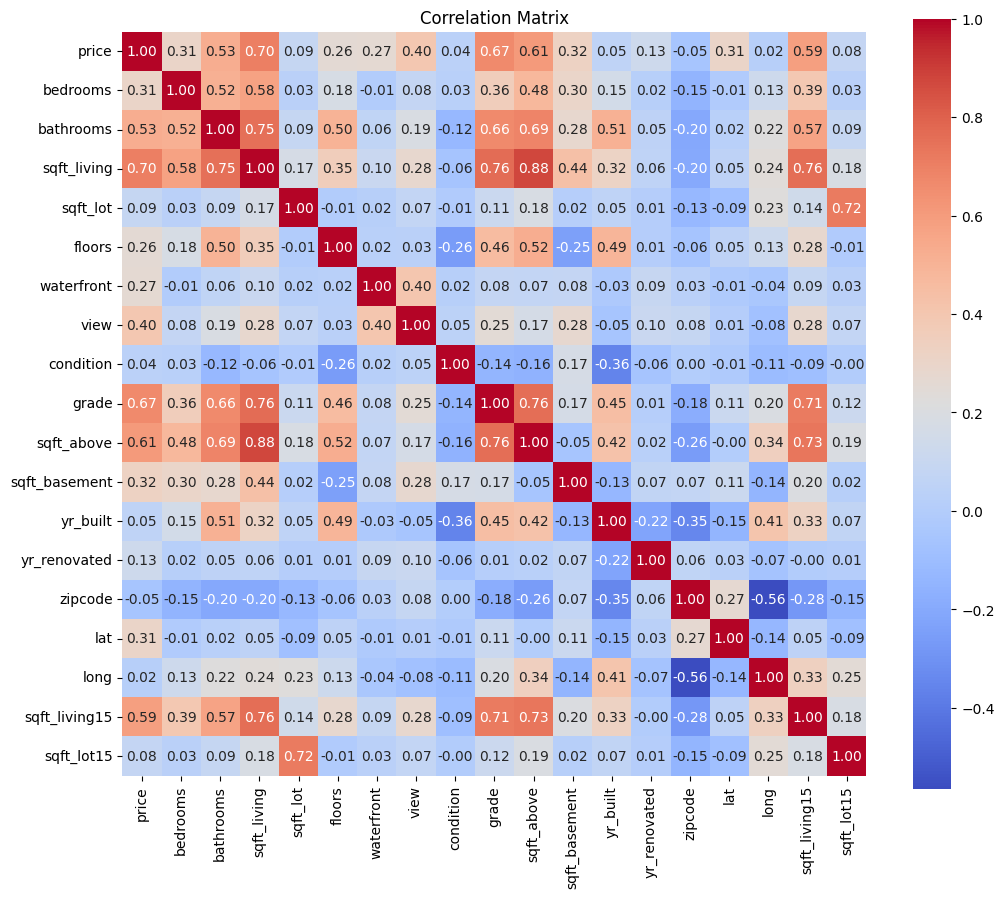

In [ ]:
# Drop the 'id' and 'date' columns
z = data.drop(['date','id'],axis=1)
# Calculate the correlation matrix
correlation_matrix = z.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10)) # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Dropping non-numeric columns like 'id' and 'date' if they exist, as they are not relevant for regression
# If you have categorical columns, you may need to encode them, but assuming all are numeric for this example.

# Assuming 'price' is the target variable
x = data.drop(['price', 'id', 'date'], axis=1)  # Dropping irrelevant columns for the regression task
y = data['price']  # Target variable

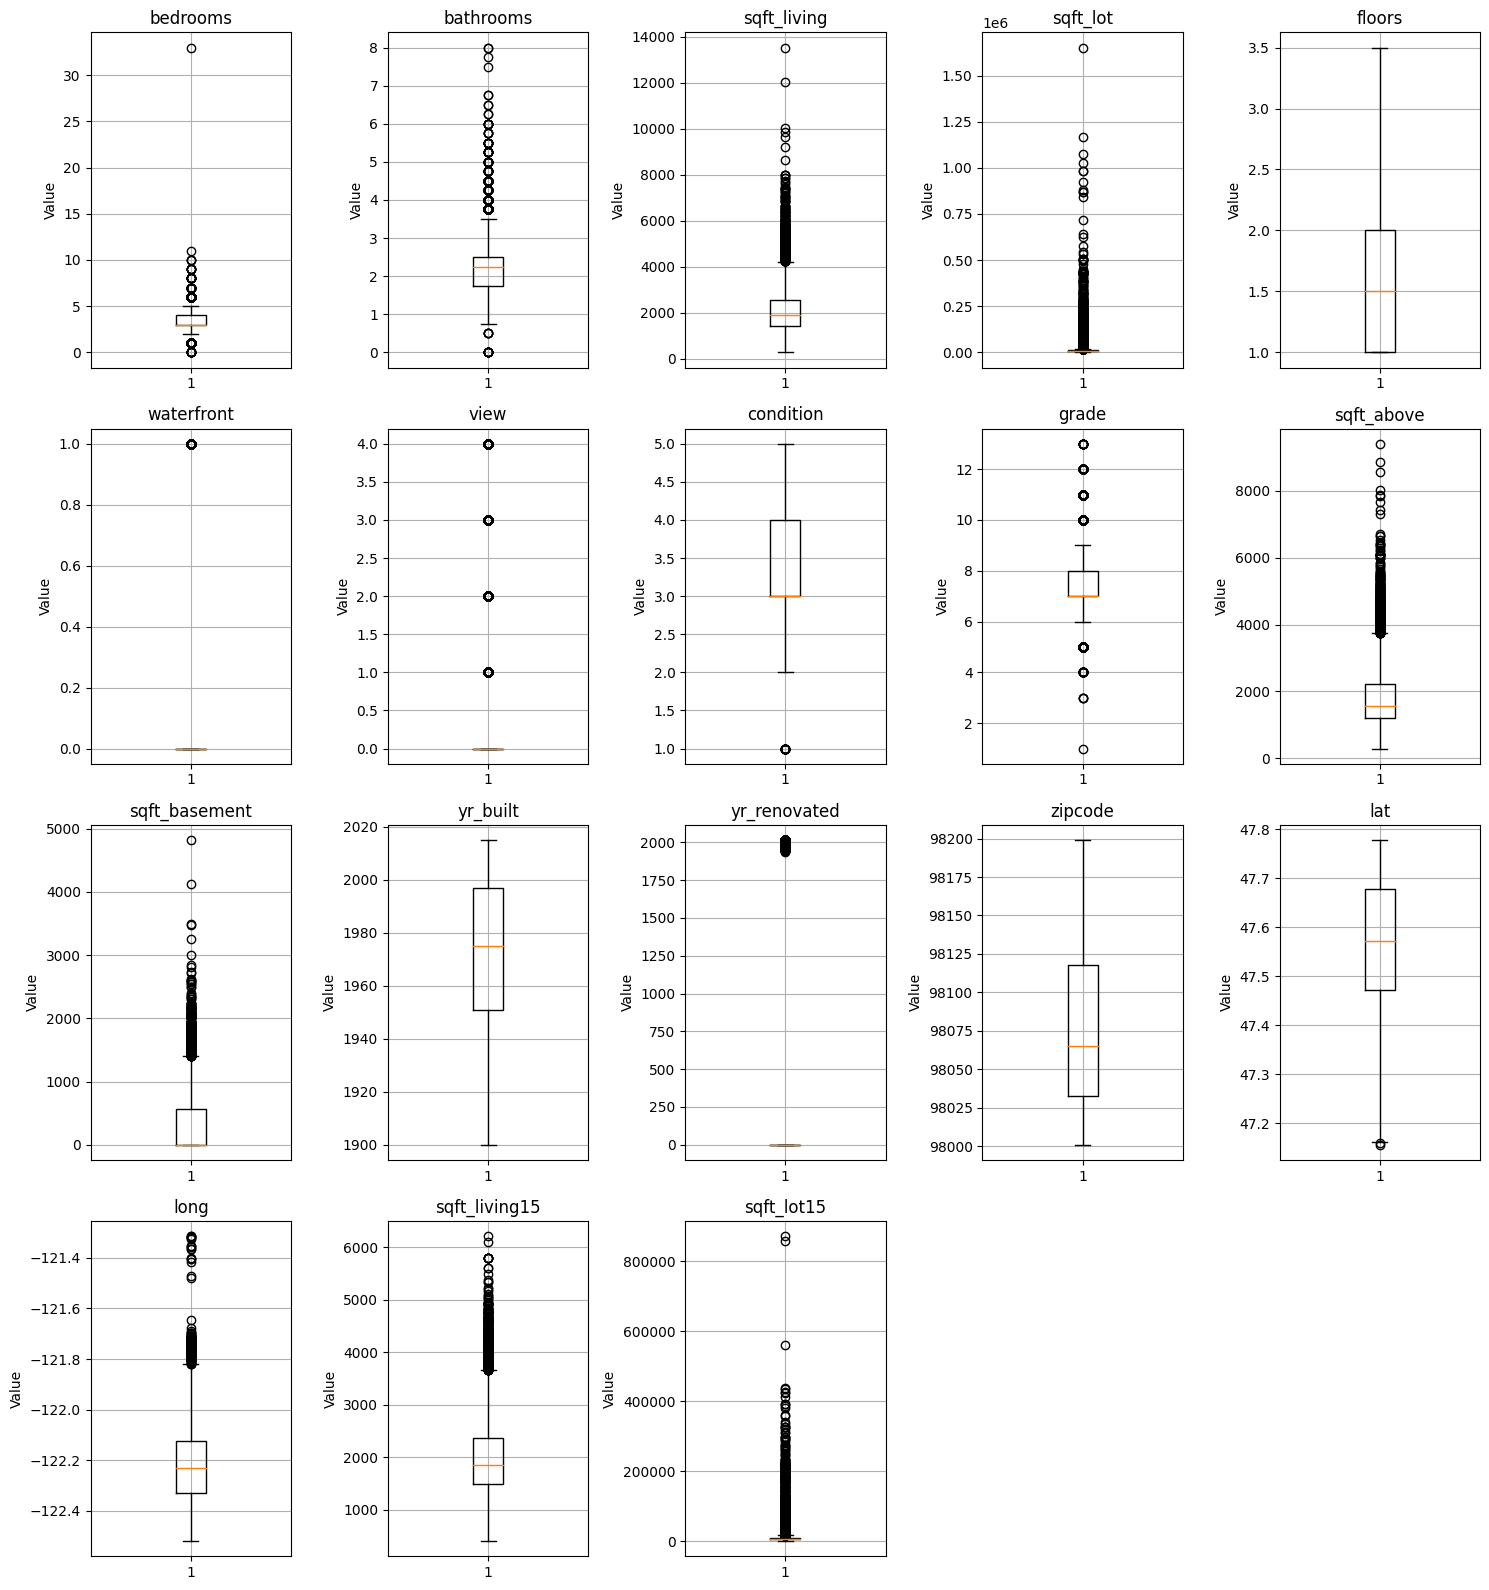

In [ ]:
num_columns = x.shape[1]
num_rows = (num_columns + 4) // 5  # Assuming you want 5 plots per row

plt.figure(figsize=(15, num_rows * 4))  # Adjust the size as needed

for i, column in enumerate(x.columns):
    plt.subplot(num_rows, 5, i + 1)  # Create a subplot
    plt.boxplot(x[column])
    plt.title(column)
    plt.ylabel('Value')
    plt.grid()

plt.tight_layout()
plt.show()


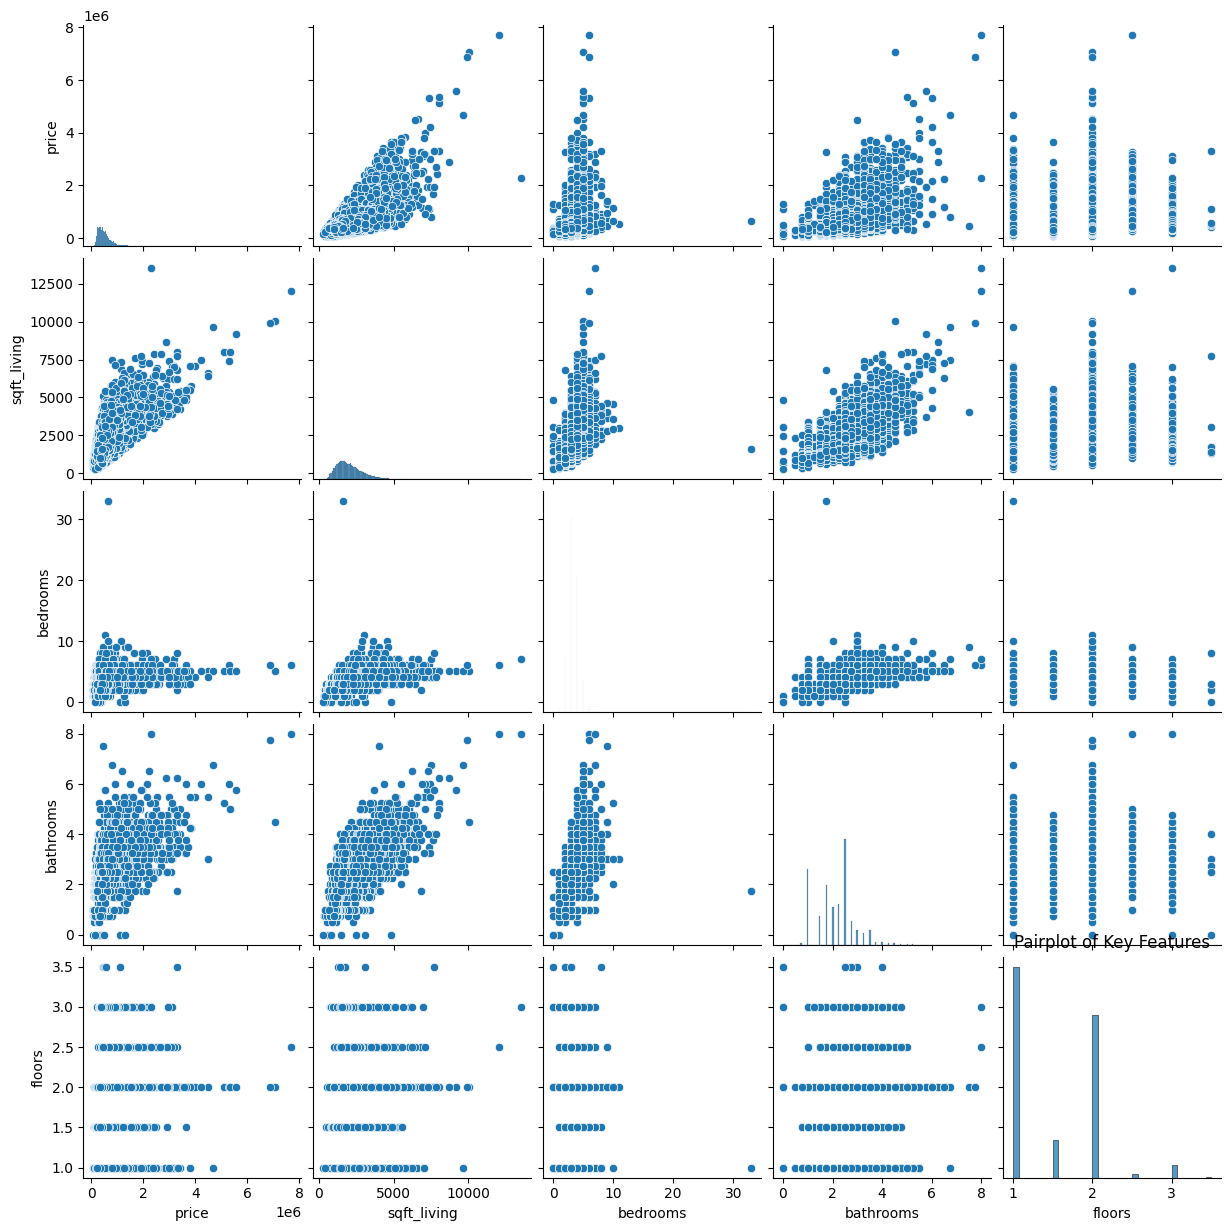

In [ ]:
# Step 2: Pairplot to Explore Relationships
sns.pairplot(data[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']])
plt.title('Pairplot of Key Features')
plt.show()



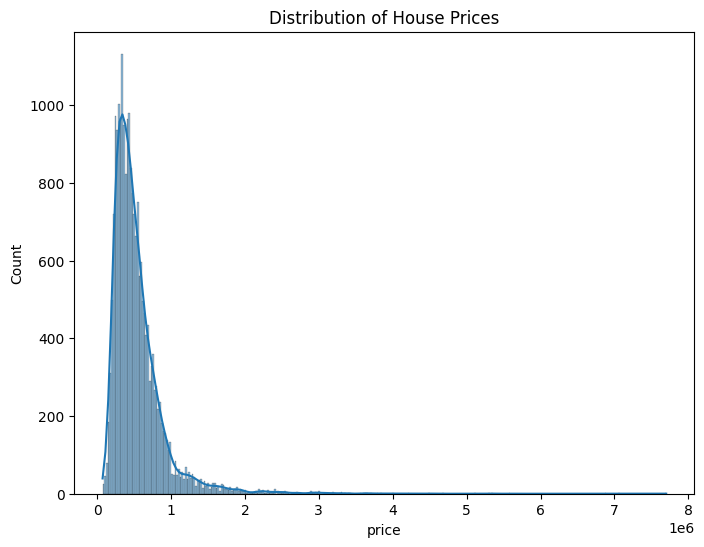

In [ ]:
# Step 3: Distribution Plot of Target Variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [ ]:
# Multicollinearity Check (VIF)

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature           VIF
0        bedrooms  2.327239e+01
1       bathrooms  2.861188e+01
2     sqft_living           inf
3        sqft_lot  2.377656e+00
4          floors  1.689222e+01
5      waterfront  1.212827e+00
6            view  1.551834e+00
7       condition  3.471167e+01
8           grade  1.473809e+02
9      sqft_above           inf
10  sqft_basement           inf
11       yr_built  9.588180e+03
12   yr_renovated  1.195015e+00
13        zipcode  1.630845e+06
14            lat  1.390263e+05
15           long  1.359553e+06
16  sqft_living15  2.710315e+01
17     sqft_lot15  2.598758e+00


In [ ]:
x= data.drop(['yr_built','price','id','date','sqft_lot','sqft_above','sqft_basement'],axis=1)

In [ ]:
# Feature Importance - Using Linear Regression Coefficients
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = LinearRegression()


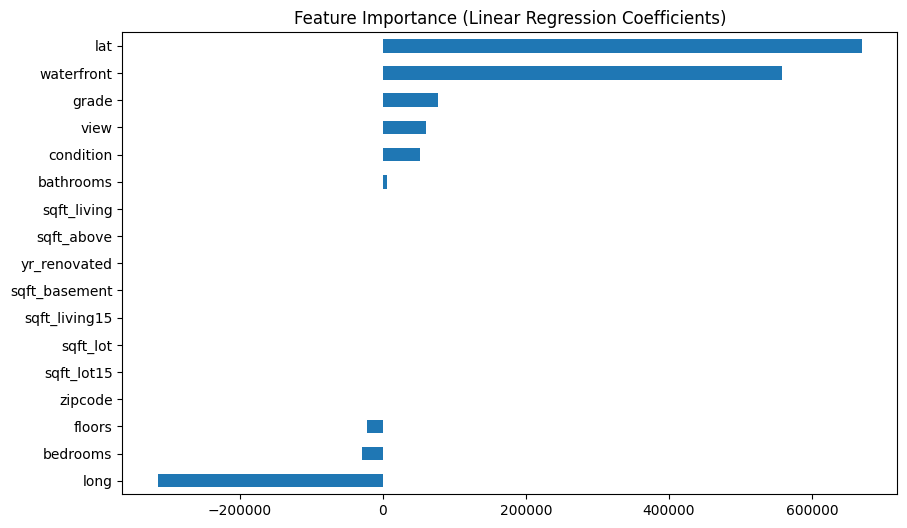

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()



In [ ]:
# Train the model with the training data
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Print the coefficients for each feature
model.intercept_
model.coef_

array([-2.95010408e+04,  1.07364631e+03,  1.88889983e+02, -1.08342249e+04,
        5.63115836e+05,  5.76138017e+04,  5.06876368e+04,  7.91622607e+04,
        6.38023669e+01, -4.06993864e+02,  6.59397360e+05, -2.93761508e+05,
        2.78996162e+01, -1.71109022e-01])

In [ ]:
# Step 4: Residual Plot (Linear Regression)
y_pred = model.predict(x_test)
residuals = y_test - y_pred


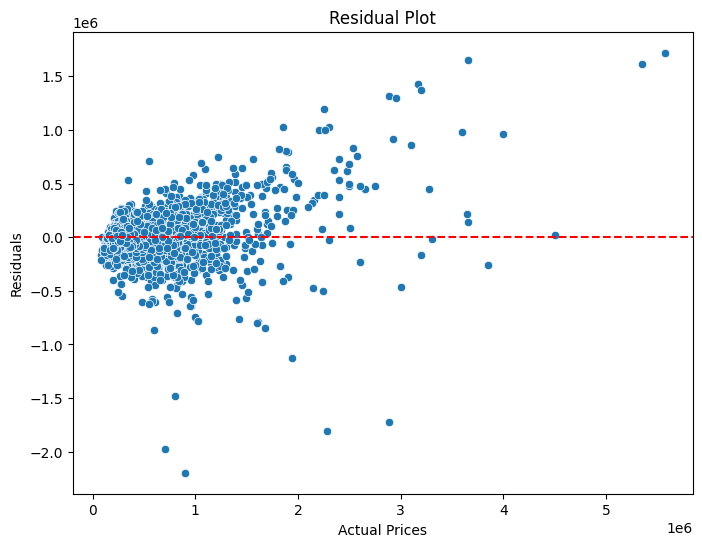

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()


In [ ]:
# Display the first few predictions
Predicted_prices = y_pred[:5]
print("Predicted prices:", Predicted_prices)




Predicted prices: [ 523969.27696824  835923.77144027 1255610.9042933  2061514.35827255
  651753.00242352]


In [ ]:
# and the actual price of those predictions
Actual_prices = y_test[:5].values
Actual_prices

array([ 365000.,  865000., 1038000., 1490000.,  711000.])

In [ ]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

31567013032.576416

In [ ]:
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
r2


0.7911912981746652

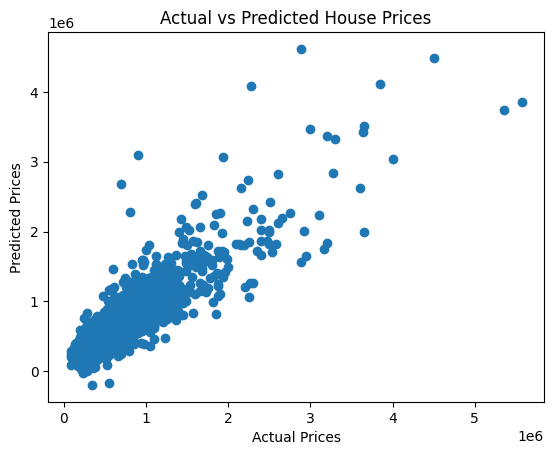

In [ ]:
# Plotting the actual vs predicted house prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


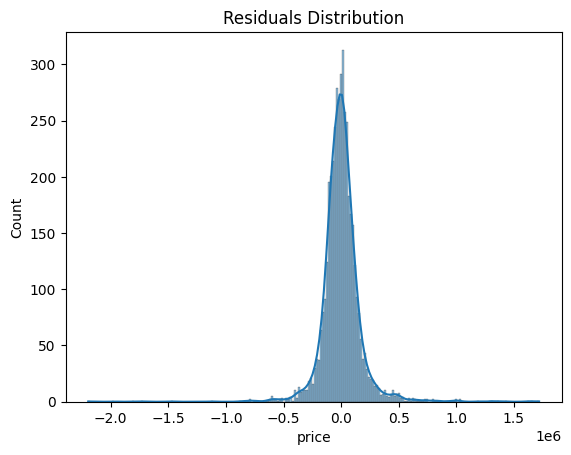

In [ ]:
# Plotting the residuals (errors) to check for any patterns
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

NOW TESTING FOR POLYNOMIAL OF DEGREE 2

In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [ ]:
# Fit the model
model = LinearRegression()
model.fit(x_poly_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_pred_poly = model.predict(x_poly_test)


In [ ]:
# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error: {mse1}')

Mean Squared Error: 31530735152.469555


In [ ]:
# Calculate the R-squared value
r2_1 = r2_score(y_test, y_pred_poly)
r2_1

0.7914312682042106

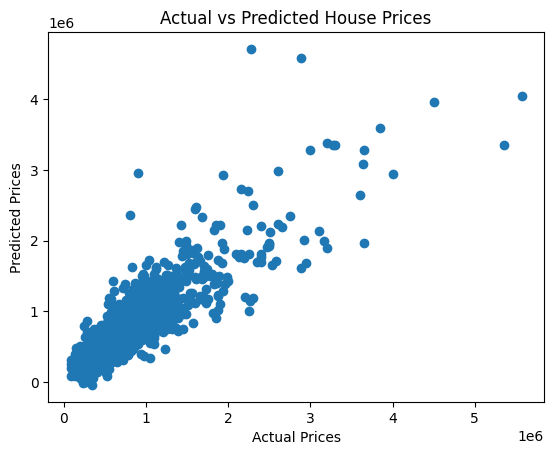

In [ ]:
# Plotting the actual vs predicted house prices
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


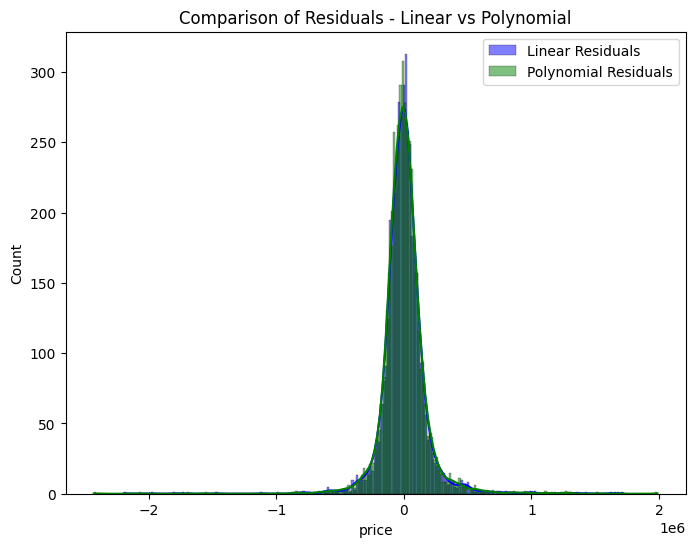

In [ ]:
# Step 6: Compare Residuals of Linear and Polynomial Models
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', label='Linear Residuals')
sns.histplot(residuals_poly, kde=True, color='green', label='Polynomial Residuals')
plt.title('Comparison of Residuals - Linear vs Polynomial')
plt.legend()
plt.show()

